In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(42)
X = torch.rand(100, 1) * 10  
y = 2 * X + 3 + torch.randn(100, 1) * 2  

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [6]:
def train(model, optimizer, X, y, lr, epochs=1000, batch_size=10):
    criterion = nn.MSELoss()
    loss_history = []

    for epoch in range(epochs):
        indices = torch.randperm(len(X))
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, len(X), batch_size):
            x_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)

            loss.backward()
            optimizer.step()

        loss_history.append(loss.item())

    return loss_history

In [7]:
learning_rates = [0.001, 0.01, 0.1, 0.5]  # Разные значения lr
loss_histories = {}

for lr in learning_rates:
    model = LinearRegression()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_histories[lr] = train(model, optimizer, X, y, lr)


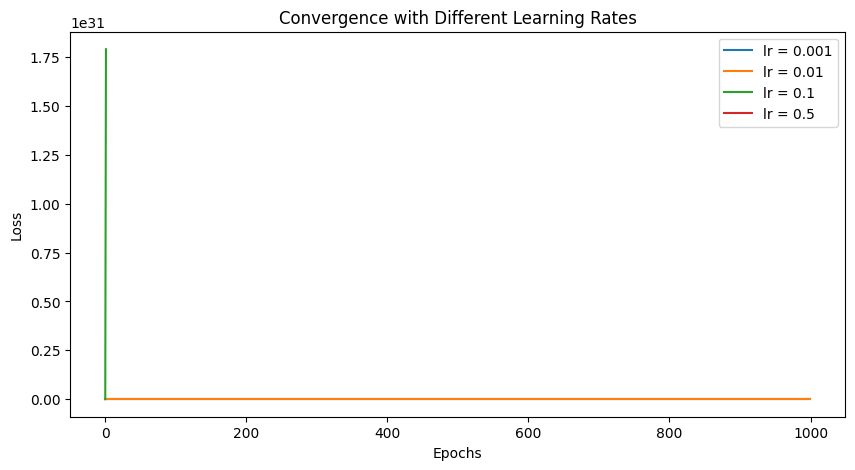

In [8]:
plt.figure(figsize=(10, 5))

for lr, loss_history in loss_histories.items():
    plt.plot(loss_history, label=f'lr = {lr}')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Convergence with Different Learning Rates")
plt.legend()
plt.show()

adaptive optimis

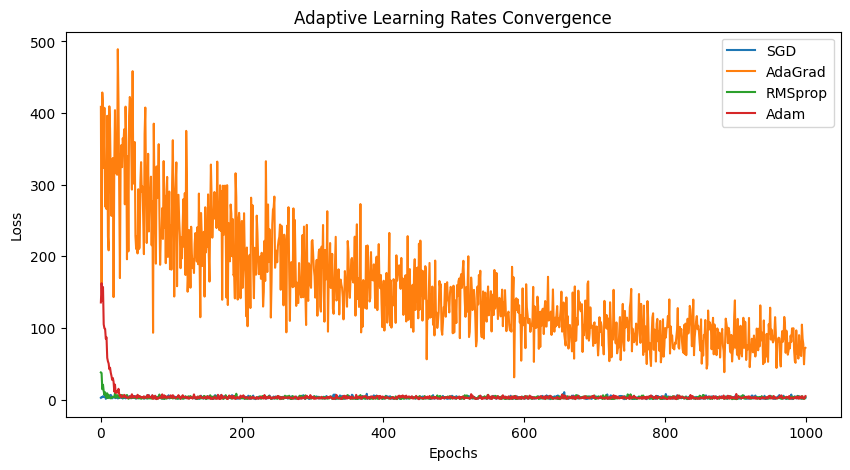

In [9]:
adaptive_optimizers = {
    "SGD": optim.SGD,
    "AdaGrad": optim.Adagrad,
    "RMSprop": optim.RMSprop,
    "Adam": optim.Adam
}

adaptive_losses = {}

for name, opt_class in adaptive_optimizers.items():
    model = LinearRegression()
    optimizer = opt_class(model.parameters(), lr=0.01)
    adaptive_losses[name] = train(model, optimizer, X, y, lr=0.01)

plt.figure(figsize=(10, 5))

for name, loss_history in adaptive_losses.items():
    plt.plot(loss_history, label=name)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Adaptive Learning Rates Convergence")
plt.legend()
plt.show()